# Lindblad problem: the Finsler case

In [1]:
# some_file.py
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../')
#
import numpy as np              # scientific computing tools
import wrappers                 # for compilation of Fortran Hamiltonian codes
import geometry2d.database
import geometry2d.conjugate
import geometry2d.errors
import geometry2d.geodesic
import geometry2d.plottings
import geometry2d.problem
import geometry2d.splitting
import geometry2d.utils
import geometry2d.wavefront
import matplotlib.pyplot as plt # for plots
%matplotlib inline

In [2]:
!pygmentize hfun.f90

! Lindblad
subroutine hfun(x, p, d, h)

    double precision, intent(in)  :: x(2), p(2), d
    double precision, intent(out) :: h

    ! local variables
    double precision :: r, th, pr, pth
    double precision :: l, m2, mu

    r   = x(1)
    th  = x(2)

    pr  = p(1)
    pth = p(2)

    l   = 4d0/5d0
    m2  = sin(r)**2/(1d0-l*sin(r)**2)
    mu  = d*sin(2*r)

    h   = mu*pr + sqrt(pr**2 + pth**2/m2)

end subroutine hfun


In [3]:
# Parameters
d  = 0.3 # Finslerian case
r0 = np.pi/2.0  # initial azimuth
θ0 = 0.0  # initial latitude
t0 = 0.0  # initial time

name = 'lindblad_finsler' # name of the problem

# Initialize data
data_file = 'data_lindblad_finsler.json'
restart   = False # restart or not the computations
data      = geometry2d.database.Data({'name': name,
                      't0': t0, 
                      'r0': r0, 
                      'θ0': θ0, 
                      'd': d}, data_file, restart)

# Initial point
q0 = np.array([r0, θ0])

In [4]:
# Hamiltonian and derivatives up to order 3
H = wrappers.hamiltonian(d, compile=False, display=False)

# The Riemannian metric associated to the Zermelo problem
# g = g1 dr^2 + g2 dθ^2
def g(q):
    λ  = 4.0/5.0
    r  = q[0] 
    g1 = 1.0
    g2 = np.sin(r)**2/(1.0-λ*np.sin(r)**2)
    return g1, g2

# problem
prob = geometry2d.problem.GeometryProblem2D(name, H, g, t0, q0, data)

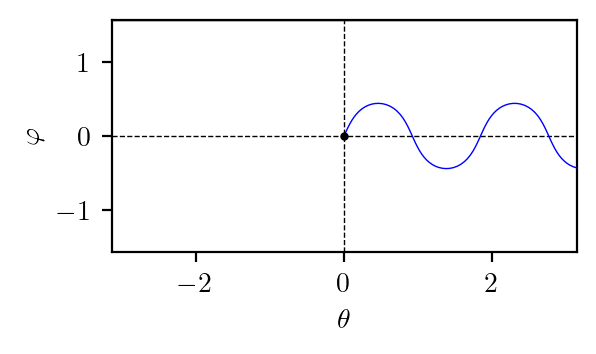

In [5]:
# Geodesics
geodesic = geometry2d.geodesic.Geodesic(prob)

# Compute a geodesic
t  = 8.0
α0 = np.pi/4.0
q1 = geodesic.compute(t, α0)
geodesic.plot_2d(q1)

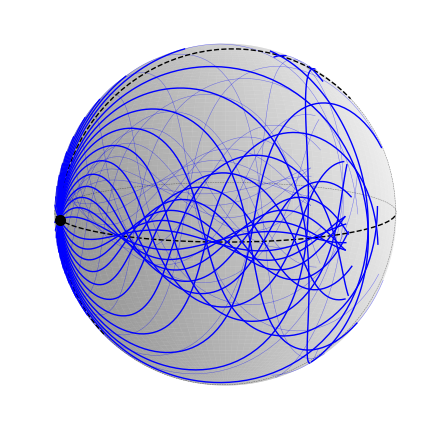

<Figure size 640x480 with 0 Axes>

In [6]:
geodesic.plot(N=50, tf=5.0, azimuth=100)

In [7]:
# Conjugate locus
conjugate = geometry2d.conjugate.Conjugate(prob)

conj = conjugate.compute()
t_conj = conjugate.conjugate_time(conj)

 > Get first conjugate time and point:


     Calls  |f(x)|                 |x|
 
         1  1.978793647849677e+00  4.623927143500590e+00
         2  8.794142226601365e-01  5.760890309585755e+001593e+00 for α = -1.560796e+00
         3  3.171866885656574e-01  6.441692130173831e+006494e+00 for α = -1.560796e+00
         4  1.306881563658847e+01  6.831698962138249e+007091e+00 for α = -1.560796e+00
         5  2.667609017650854e-01  6.436864714847450e+008277e+00 for α = -1.560796e+00
         6  2.475522034748412e-01  6.444551896408000e+002180e+00 for α = -1.560796e+00
         7  1.040473441095002e-01  6.500682205048438e+000353e+00 for α = -1.560796e+00
         8  2.989588184010686e-02  6.540302402634547e+000796e+00 for α = -1.560796e+00
         9  5.508797172344464e-03  6.530959354896805e+005995e+00 for α = -1.560796e+00
        10  3.355696147902963e-04  6.532378688557300e+007534e+00 for α = -1.560796e+00
        11  2.057149601982373e-06  6.532470019332076e+008805e+00 for α = -1.56

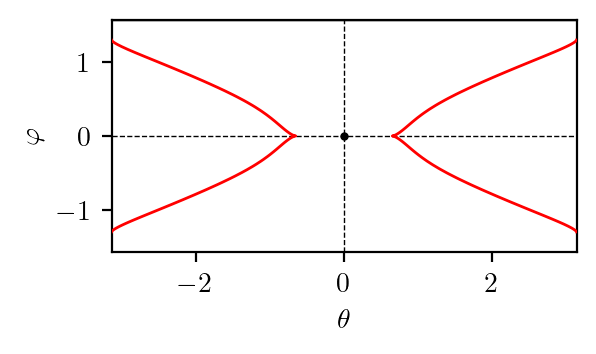

In [8]:
conjugate.plot_2d(conj)

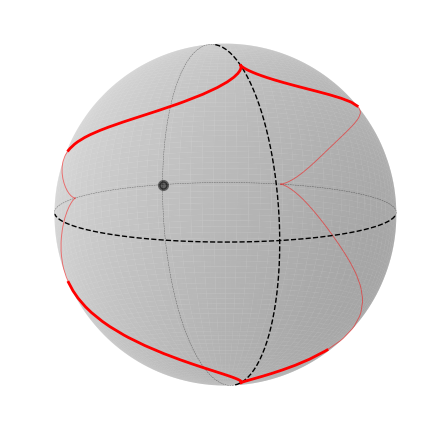

<Figure size 640x480 with 0 Axes>

In [9]:
conjugate.plot_3d(conj)

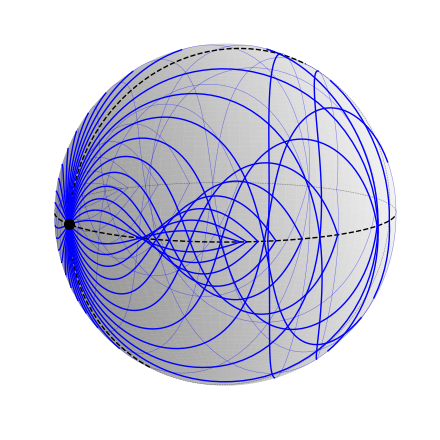

<Figure size 640x480 with 0 Axes>

In [10]:
fig = geodesic.plot(N=45, tf=geodesic.return_to_equator, length=1.0, azimuth=110)
fig

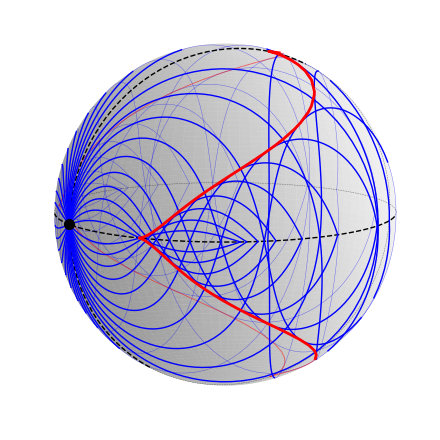

In [11]:
conjugate.plot(figure=fig, plot_surface=False)

In [12]:
wavefront = geometry2d.wavefront.WaveFront(prob)
w = wavefront.compute(3.0)


 > Get wavefront for tf = 3.0 

    Progress: [------------------------------------------------->] 100.00 %


 > Get wavefront for tf = 3.0 

    Progress: [------------------------------------------------->] 100.00 %



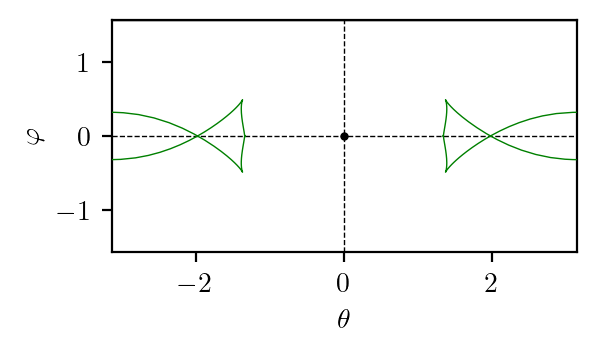

In [13]:
wavefront.plot_2d(w)

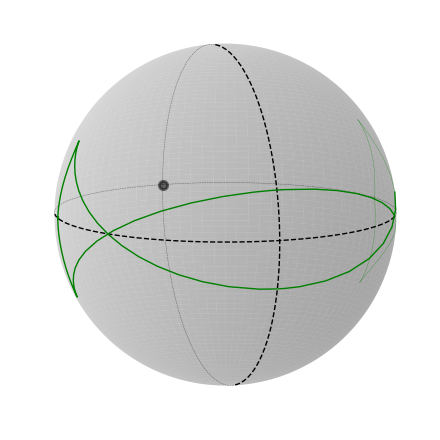

<Figure size 640x480 with 0 Axes>

In [14]:
wavefront.plot_3d(w)

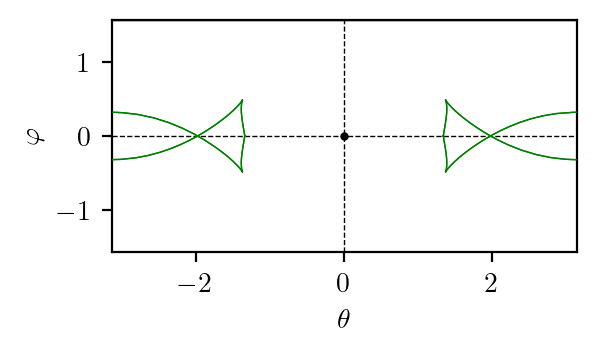

In [16]:
fig = wavefront.plot(3.0, view=geometry2d.plottings.Coords.PLANE)
wavefront.plot(3.0, figure=fig, view=geometry2d.plottings.Coords.PLANE)

In [19]:
intersections = wavefront.self_intersections(3.0)
print(intersections['left'])
print(intersections['right'])

(3.0, 1.8184590356830708, 4.465339870497191, array([ 1.57027886, -1.9793787 ]))
(3.0, -1.3232252257452872, 1.3236757479515755, array([1.57120897, 1.9797271 ]))


In [20]:
splitting = geometry2d.splitting.Splitting(prob)
cut = splitting.compute(intersections)


 > Get splitting locus

    Progress: [--------------------->                            ] 45.72 %
  ||| WARNING: maximum iterations during correction reached!
    Progress: [--------------------->                            ] 45.73 %
  ||| WARNING: maximum iterations during correction reached!
    Progress: [--------------------->                            ] 45.74 %
  ||| WARNING: maximum iterations during correction reached!
    Progress: [--------------------->                            ] 45.74 %
  ||| WARNING: maximum iterations during correction reached!
    Progress: [--------------------->                            ] 45.74 %
  ||| WARNING: maximum iterations during correction reached!
    Progress: [--------------------->                            ] 45.75 %
  ||| WARNING: maximum iterations during correction reached!
    Progress: [--------------------->                            ] 45.76 %
  ||| WARNING: maximum iterations during correction reached!
    Progress: [--------

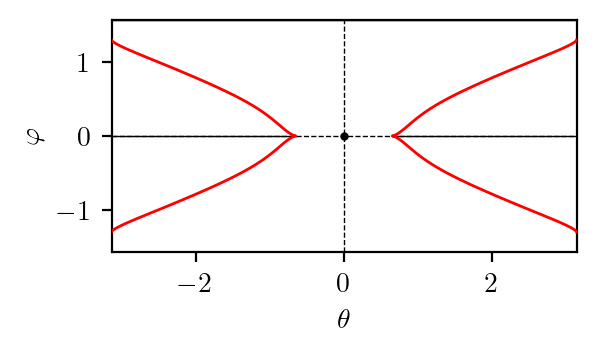

In [21]:
fig2d = conjugate.plot_2d(conj)
splitting.plot_2d(cut, figure=fig2d)

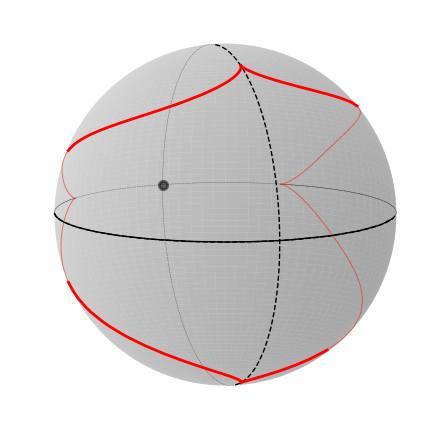

<Figure size 640x480 with 0 Axes>

In [22]:
fig3d = conjugate.plot_3d(conj)
splitting.plot_3d(cut, figure=fig3d)

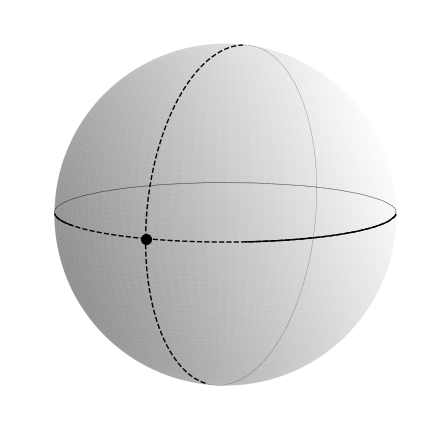

<Figure size 640x480 with 0 Axes>

In [23]:
splitting.plot(azimuth=150)

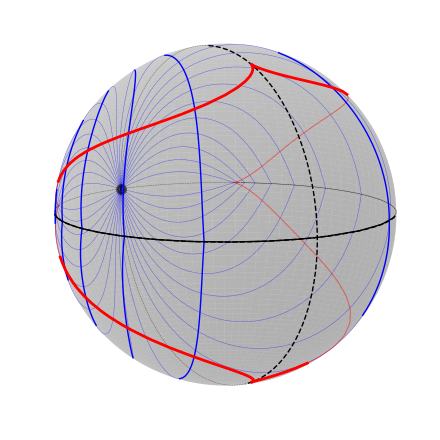

<Figure size 640x480 with 0 Axes>

In [24]:
t_cut = splitting.splitting_time(cut)
fig = geodesic.plot(N=45, tf=t_cut, length=1, azimuth=35)
splitting.plot(figure=fig)
conjugate.plot(figure=fig, plot_surface=False)
fig